# Relationships of CA SAT Scores

## Content:
1. Imports
2. Exploring Relationships: Correlations - heatmap, scatterplot
3. Addressing outliers & Re-cleaning
4. Exploring Relationships: New correlation insights, pair plots, categorical plots
5. Questions & Hypotheses
6. Summary
7. Exports

### 1. Importing Libraries

In [2]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# checking matplotlib's version

matplotlib.__version__

'3.9.2'

In [4]:
# Defining path and importing df

path = r'C:\Users\walls\Documents\Coding\Data Analysis\CareerFoundry\Data Immersion A6\CA SAT Analysis'
df_sat_cleaned = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'SAT_Report_cleaned.csv'), index_col = False)

In [5]:
df_sat_cleaned.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
0,0,0.000000e+00,X,NaN,NaN,NaN,492835,214262,484.0,494.0,477.0,89840.0,41.93,FY16
1,1,1.000000e+12,C,NaN,NaN,Alameda,16662,8611,517.0,534.0,515.0,4696.0,54.53,FY16
2,2,1.100170e+12,D,NaN,Alameda County Office of Education,Alameda,263,95,395.0,378.0,388.0,6.0,6.32,FY16
3,3,1.100170e+12,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391.0,376.0,386.0,5.0,5.43,FY16
4,4,1.611190e+12,D,NaN,Alameda Unified,Alameda,858,472,527.0,543.0,514.0,301.0,63.77,FY16


In [6]:
df_sat_cleaned.shape

(2334, 14)

In [7]:
# Change cds_code to string

df_sat_cleaned['cds_code'] = df_sat_cleaned['cds_code'].astype(str)

In [8]:
df_sat_cleaned.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
0,0,0.0,X,NaN,NaN,NaN,492835,214262,484.0,494.0,477.0,89840.0,41.93,FY16
1,1,1000000000000.0,C,NaN,NaN,Alameda,16662,8611,517.0,534.0,515.0,4696.0,54.53,FY16
2,2,1100170000000.0,D,NaN,Alameda County Office of Education,Alameda,263,95,395.0,378.0,388.0,6.0,6.32,FY16
3,3,1100170000000.0,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391.0,376.0,386.0,5.0,5.43,FY16
4,4,1611190000000.0,D,NaN,Alameda Unified,Alameda,858,472,527.0,543.0,514.0,301.0,63.77,FY16


### 2. Exploring Relationships

#### Correlations

In [9]:
# Create numerical subset

df_numeric = df_sat_cleaned.select_dtypes(include=[np.number])

In [10]:
df_numeric.head()

,index,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage
0,0,492835,214262,484.0,494.0,477.0,89840.0,41.93
1,1,16662,8611,517.0,534.0,515.0,4696.0,54.53
2,2,263,95,395.0,378.0,388.0,6.0,6.32
3,3,88,92,391.0,376.0,386.0,5.0,5.43
4,4,858,472,527.0,543.0,514.0,301.0,63.77


In [11]:
# Remove index column and cds_code (irrelevant data)

df_numeric = df_numeric.drop(['index', 'percentage'], axis=1)

In [12]:
df_numeric.shape

(2334, 6)

In [13]:
# Create a correlation matrix heatmap

df_numeric.corr()

,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
enroll12,1.000000,0.998599,0.008452,0.014379,0.011107,0.996692
test_takers,0.998599,1.000000,0.009550,0.017070,0.013656,0.995254
avg_scr_read,0.008452,0.009550,1.000000,0.954496,0.980316,0.036111
avg_scr_math,0.014379,0.017070,0.954496,1.000000,0.964170,0.045008
avg_scr_writ,0.011107,0.013656,0.980316,0.964170,1.000000,0.041027
scr>1500,0.996692,0.995254,0.036111,0.045008,0.041027,1.000000


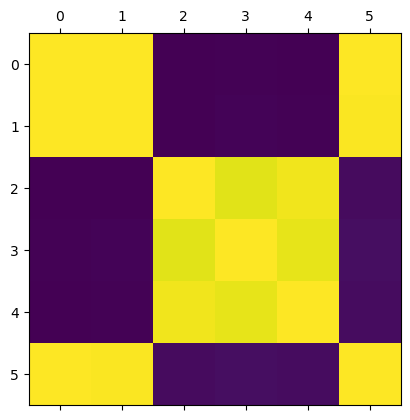

In [14]:
# Create a correlation heatmap using matplotlib

heatmap1 = plt.matshow(df_numeric.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

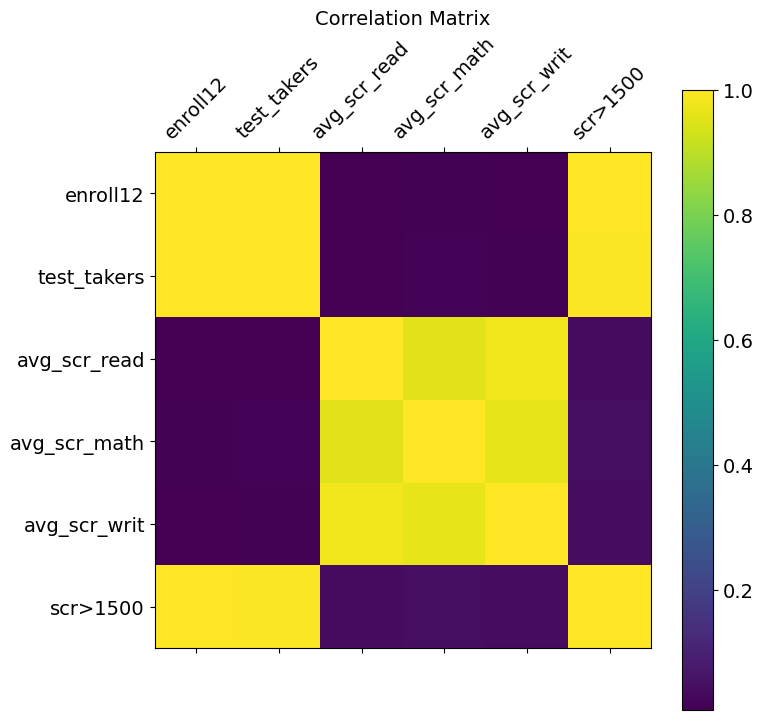

In [15]:
# Add labels, a legend, and change the size of the heatmap

heatmap_titled = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_numeric.corr(), fignum=heatmap_titled.number) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

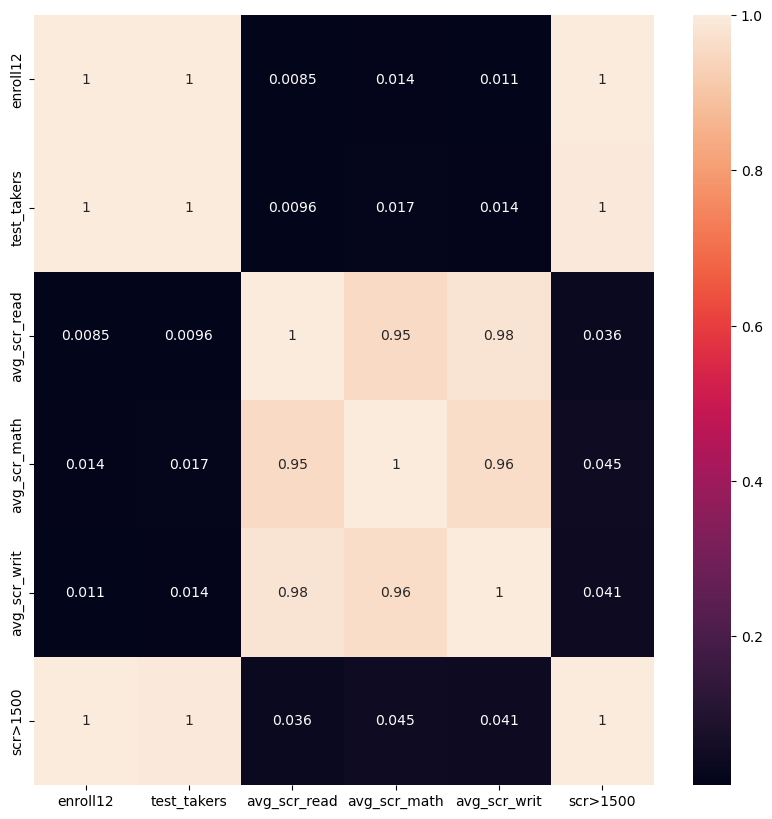

In [16]:
# Create a subplot with matplotlib
heatmap_titled,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_map = sns.heatmap(df_numeric.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

##### Observations:
1. Diagonal ones can be ignored as they are crossed referenced with themselves
2. 1 outside of the diagnal include: enroll12-scr>1500, test_takers-scr>1500, test_takers-enroll12 > Strongest correlations <
3. Test_takers or enroll12 doesn't seem to be correlated with avg test scores.
4. The correlation between the three average test score columns have second highest correlation set here.

#### Scatterplots

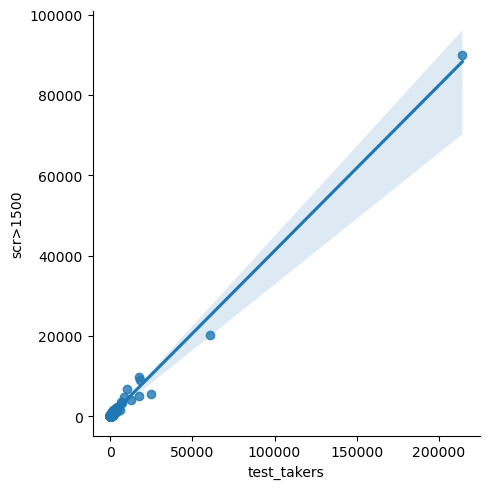

In [17]:
# Create a scatterplot for the "test_takers" and "scr>1500" columns in seaborn

scatterplot1 = sns.lmplot(x = 'test_takers', y = 'scr>1500', data = df_numeric)

##### "If the number of test takers are high, then the higher the SAT scores are"
##### Observations: 
1. Postive correlation indicated by the upward line
2. Most of the data points are close to the line, strong correlation
3. Possible two outliers, though both are close to the line
4. Now curious if things like school, district, county and number of students in school affect scores or the number of test takers
5. Likely outlier at the top right corner

### 3. Adressing Outliers & Re-cleaning

In [18]:
# Addressing the outlier value

df_numeric.max()

enroll12        492835.0
test_takers     214262.0
avg_scr_read       657.0
avg_scr_math       710.0
avg_scr_writ       677.0
scr>1500         89840.0
dtype: float64

##### Observations:
1. The data is by school, district, and/or county. This could result in high enrollment numbers like enroll12 max of 493,835, which could be the entire county or district.
2. The highest score possible on the SAT is 1600 2400. March 2016 had the maximum changed to 1600.
3. Because this data is for fiscal year 2016 (2015-2016), it not know which maximum score was applied here.
4. The lowest score possible is 400

In [19]:
df_numeric.min()

enroll12          0.0
test_takers       0.0
avg_scr_read    261.0
avg_scr_math    264.0
avg_scr_writ    263.0
scr>1500          0.0
dtype: float64

##### scores over 2400 will be removed from scr>1500 

In [20]:
df_sat_cleaned2 = df_sat_cleaned.loc[df_sat_cleaned['scr>1500'] <= 2400] # new df without scores above the possible 1600 - 2400 max

In [21]:
df_sat_cleaned2.head()

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
2,2,1100170000000.0,D,NaN,Alameda County Office of Education,Alameda,263,95,395.0,378.0,388.0,6.0,6.32,FY16
3,3,1100170000000.0,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391.0,376.0,386.0,5.0,5.43,FY16
4,4,1611190000000.0,D,NaN,Alameda Unified,Alameda,858,472,527.0,543.0,514.0,301.0,63.77,FY16
5,5,1611190000000.0,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572.0,612.0,530.0,30.0,85.71,FY16
7,7,1611190000000.0,S,Alameda High,Alameda Unified,Alameda,381,255,539.0,562.0,533.0,180.0,70.59,FY16


In [22]:
df_sat_cleaned2['scr>1500'].describe()

count    1720.000000
mean      114.418605
std       207.561608
min         0.000000
25%        16.000000
50%        45.000000
75%       129.000000
max      2303.000000
Name: scr>1500, dtype: float64

In [23]:
df_sat_cleaned2.shape

(1720, 14)

##### data with record_type of "X" (other) will be removed

In [24]:
df_cleaned_no_x = df_sat_cleaned2[df_sat_cleaned2['record_type'] != 'X'] # removing values with X record_type

In [25]:
df_cleaned_no_x.head() 

,index,cds_code,record_type,school,district,county,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage,year
2,2,1100170000000.0,D,NaN,Alameda County Office of Education,Alameda,263,95,395.0,378.0,388.0,6.0,6.32,FY16
3,3,1100170000000.0,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391.0,376.0,386.0,5.0,5.43,FY16
4,4,1611190000000.0,D,NaN,Alameda Unified,Alameda,858,472,527.0,543.0,514.0,301.0,63.77,FY16
5,5,1611190000000.0,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572.0,612.0,530.0,30.0,85.71,FY16
7,7,1611190000000.0,S,Alameda High,Alameda Unified,Alameda,381,255,539.0,562.0,533.0,180.0,70.59,FY16


In [26]:
df_cleaned_no_x.describe()

,index,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500,percentage
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000
mean,1137.820930,581.161628,264.687209,477.565116,482.502907,468.487209,114.418605,38.944517
std,663.065096,1063.330730,444.766662,58.001789,61.908234,56.743751,207.561608,22.640481
min,2.000000,0.000000,15.000000,261.000000,264.000000,263.000000,0.000000,0.000000
25%,579.750000,142.750000,68.000000,436.000000,439.000000,429.000000,16.000000,20.340000
50%,1126.000000,349.500000,149.500000,477.000000,481.000000,465.000000,45.000000,37.000000
75%,1696.250000,559.000000,279.000000,519.000000,521.000000,505.000000,129.000000,55.970000
max,2333.000000,14980.000000,5992.000000,657.000000,710.000000,677.000000,2303.000000,98.530000


In [27]:
df_cleaned_no_x.shape

(1720, 14)

##### Data will be separated based on record_type

In [28]:
# Creating record_type subsets

df_record_c = df_sat_cleaned2.loc[df_sat_cleaned2['record_type'] == 'C'] # subset for county 
df_record_d = df_sat_cleaned2.loc[df_sat_cleaned2['record_type'] == 'D'] # subset for district
df_record_s = df_sat_cleaned2.loc[df_sat_cleaned2['record_type'] == 'S'] # subset for school

### 4. New Correlation Insights

##### Heatmaps & Scatterplot 

In [29]:
# Create an updated numerical subset

df_numeric2 = df_cleaned_no_x.select_dtypes(include=[np.number])

In [30]:
# Remove index column and cds_code (irrelevant data)

df_numeric2 = df_numeric2.drop(['index', 'percentage'], axis=1)

In [31]:
df_numeric2.head()

,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
2,263,95,395.0,378.0,388.0,6.0
3,88,92,391.0,376.0,386.0,5.0
4,858,472,527.0,543.0,514.0,301.0
5,37,35,572.0,612.0,530.0,30.0
7,381,255,539.0,562.0,533.0,180.0


In [32]:
# Create a correlation matrix heatmap

df_numeric2.corr()

,enroll12,test_takers,avg_scr_read,avg_scr_math,avg_scr_writ,scr>1500
enroll12,1.000000,0.952945,0.073746,0.102817,0.079635,0.834634
test_takers,0.952945,1.000000,0.098656,0.147028,0.119835,0.902281
avg_scr_read,0.073746,0.098656,1.000000,0.954425,0.980303,0.340282
avg_scr_math,0.102817,0.147028,0.954425,1.000000,0.964086,0.396894
avg_scr_writ,0.079635,0.119835,0.980303,0.964086,1.000000,0.368900
scr>1500,0.834634,0.902281,0.340282,0.396894,0.368900,1.000000


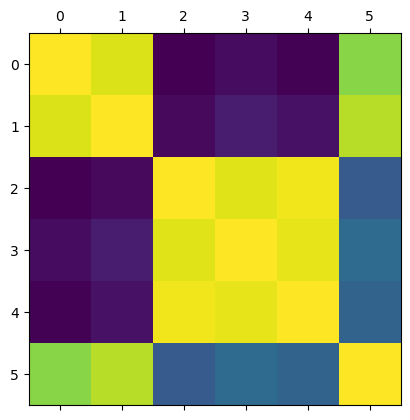

In [33]:
# Create a correlation heatmap using matplotlib

heatmap2 = plt.matshow(df_numeric2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

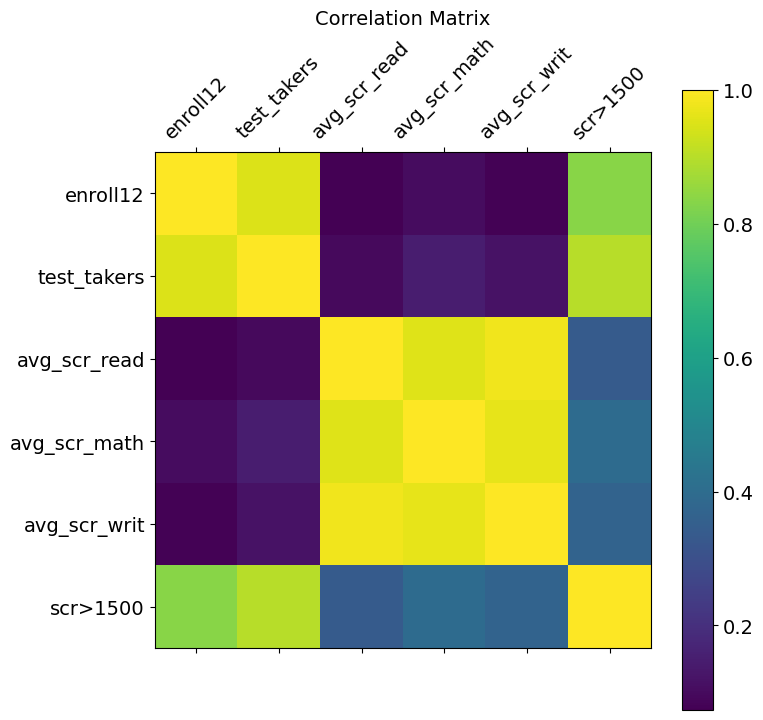

In [34]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_numeric2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_numeric2.shape[1]), df_numeric2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_numeric2.shape[1]), df_numeric2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

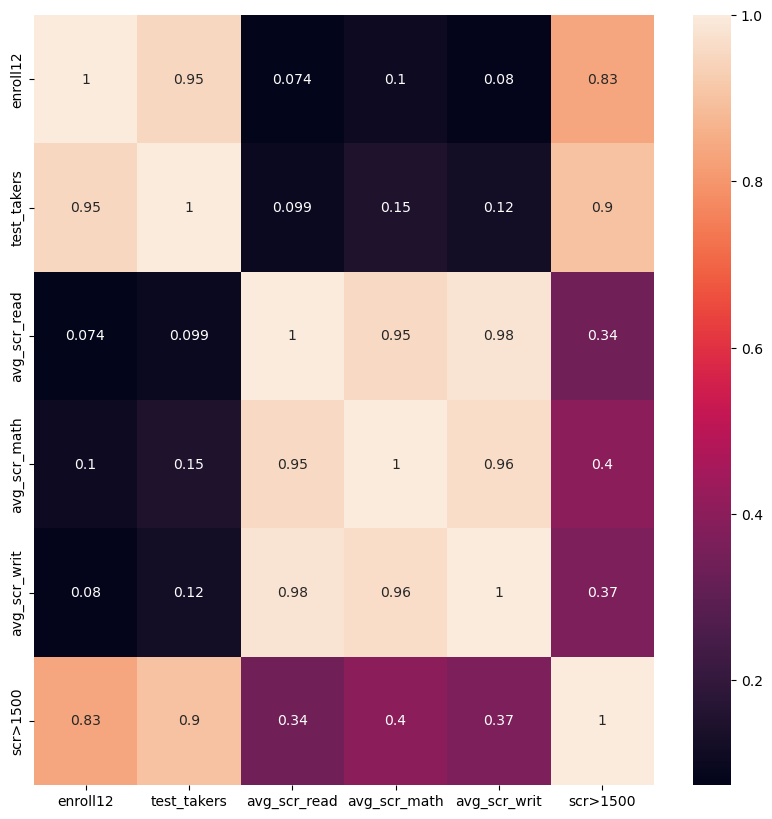

In [35]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_map2 = sns.heatmap(df_numeric2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

##### Observations:
1. Diagonal ones can be ignored as they are crossed referenced with themselves
2. No "1" outside of the diagonal
3. Strongest correlations: enroll12 & test_takers(.95), the three average test score columns (r&w - .98, r&m - .95, m&w -.96) 
4. Second strongest correlations also exist between test_takers & scr>1500 (.9), enroll12 & scr>1500 (.83)
5. Test_takers or enroll12 doesn't seem to be correlated with avg test scores.
6. The correlation between the three average test score columns have second highest correlation set here.

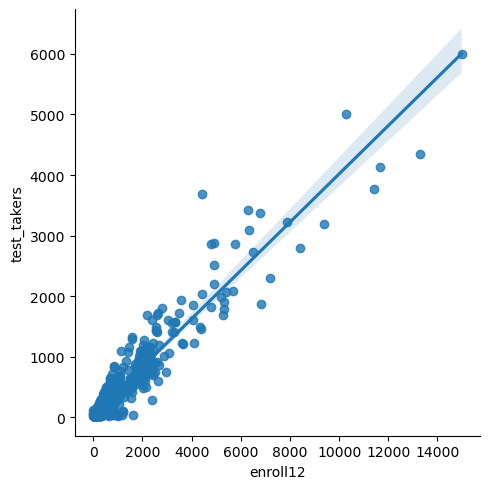

In [36]:
# Create a scatterplot for the "test_takers" and "scr>1500" columns in seaborn

scatterplot2 = sns.lmplot(x = 'enroll12', y = 'test_takers', data = df_numeric2)

##### Observations:
1. After re-cleaning, previously found strong correlation between enroll12 and scr>1500 slightly decreased
2. Positive correlation between new strongest columns enroll12 and test_takers is indicated by upwards line
3. Most data points are close to the line - indicating a strong correlation
4. Still a possibility of some outliers or special cases - this may be related to enroll12 having different record_types (county, school, distric)

#### Pair Plots

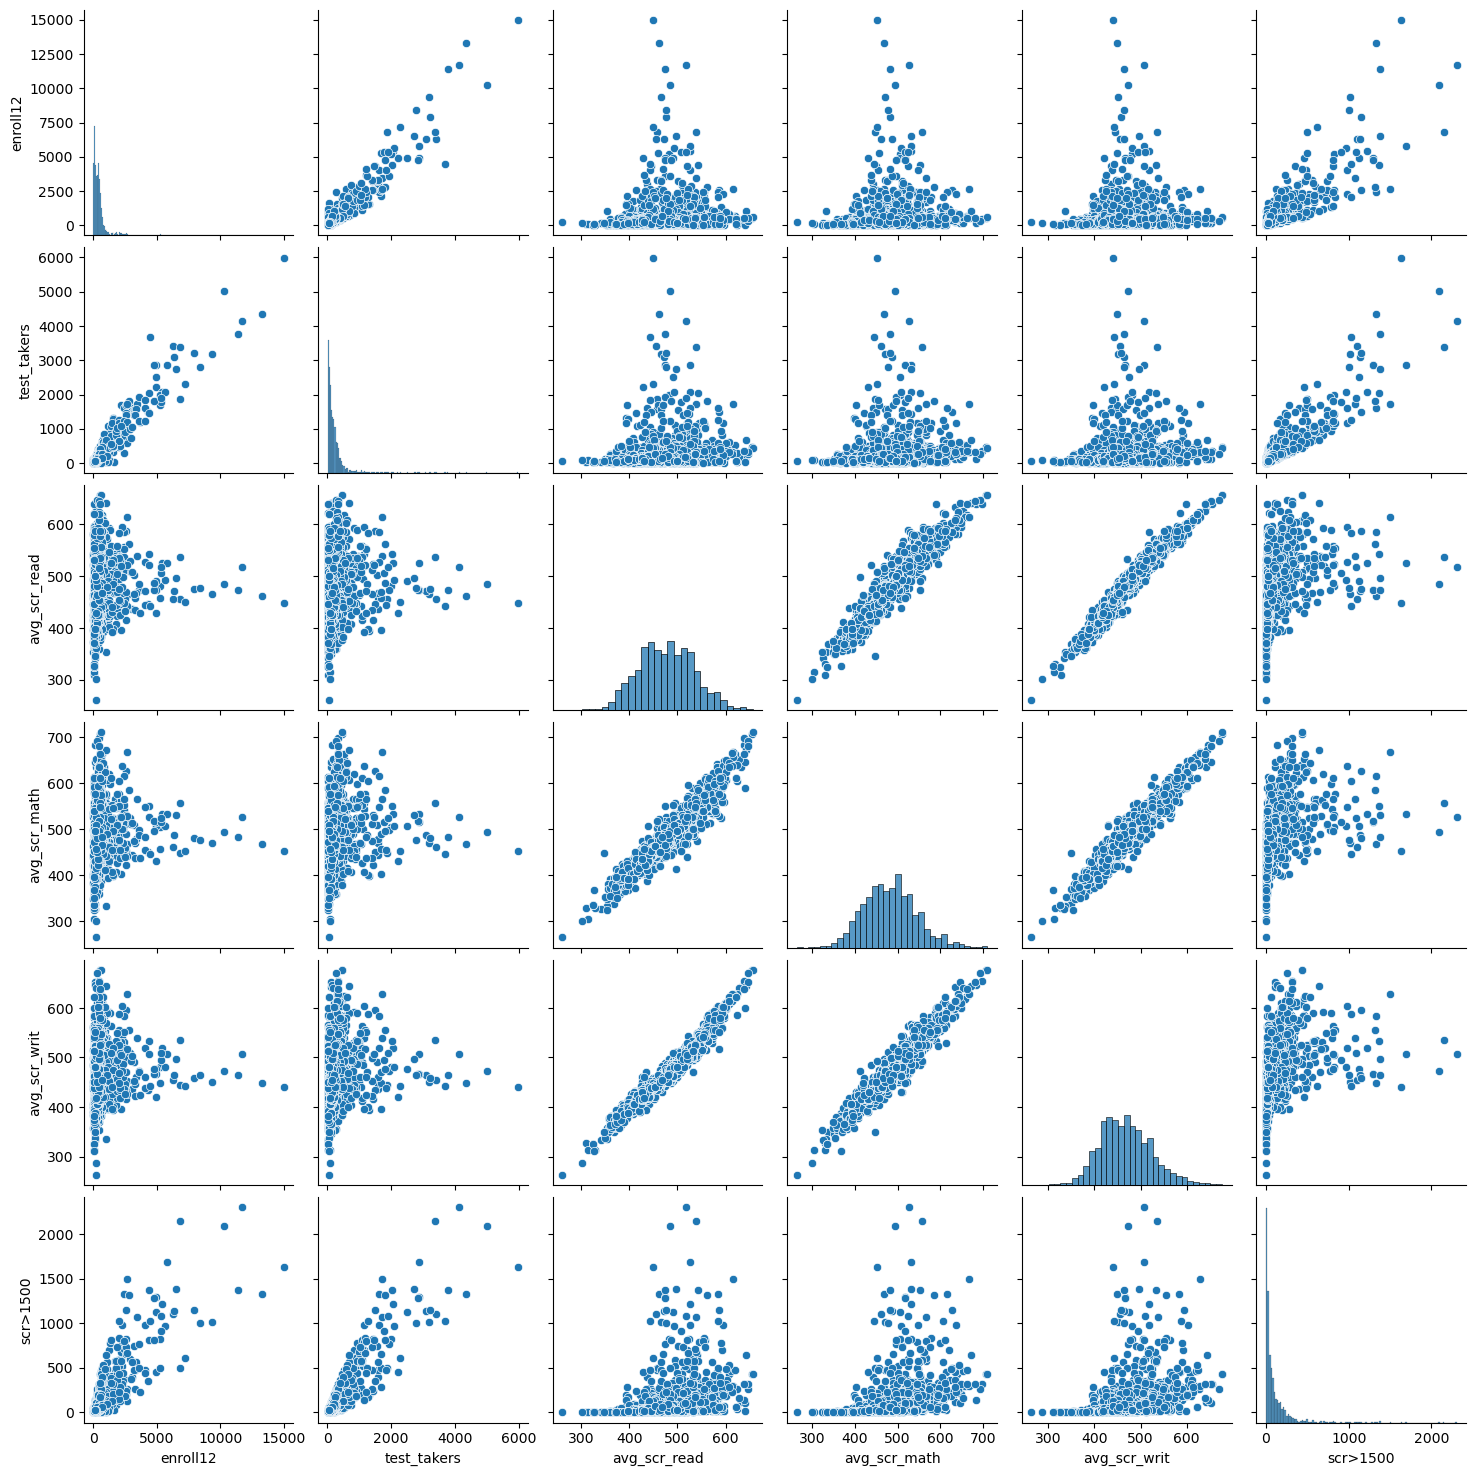

In [37]:
# Create pair plot

numeric_plot = sns.pairplot(df_numeric2)

##### Observations:
1. average scores' correlation to enrollment seem identical ? 
2. enrollment does not seem to have a correlation with SAT scores
3. average scores may have a relationship with a categorical variable instead

#### Categorical Plots

##### Deriving a new variable to use as a categorical variable

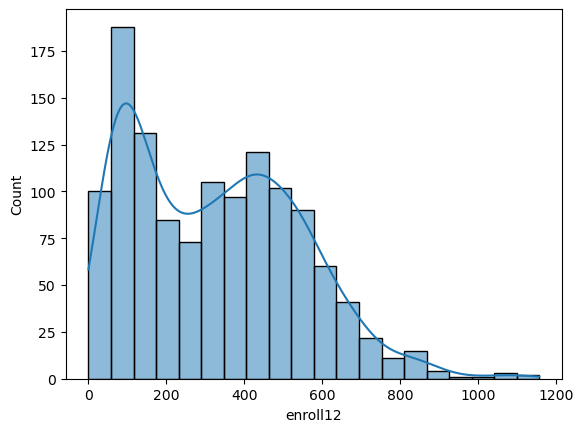

In [38]:
# Create numerical subset of df_record_s to see only school data
numeric_record_s = df_record_s.select_dtypes(include=[np.number])

numeric_record_s = numeric_record_s.drop(['index', 'percentage'], axis=1) # Remove columns (irrelevant data)

histogram = sns.histplot(numeric_record_s['enroll12'], bins = 20, kde = True) # Create a histogram based on school enrollment

##### School categories

High enrollment < 25

Average enrollment >= 25 and <100

Low enrollment >= 100

In [39]:
numeric_record_s.loc[numeric_record_s['enroll12'] >= 600, 'Enroll Category'] = 'High enrollment'
numeric_record_s.loc[(numeric_record_s['enroll12'] >= 200) & (numeric_record_s['enroll12'] < 600), 'Enroll Category'] = 'Average enrollment'
numeric_record_s.loc[numeric_record_s['enroll12'] < 200, 'Enroll Category'] = 'Low enrollment'

In [40]:
numeric_record_s['Enroll Category'].value_counts(dropna = False)

Enroll Category
Average enrollment    664
Low enrollment        453
High enrollment       135
Name: count, dtype: int64

In [41]:
numeric_record_s.columns

Index(['enroll12', 'test_takers', 'avg_scr_read', 'avg_scr_math',
       'avg_scr_writ', 'scr>1500', 'Enroll Category'],
      dtype='object')

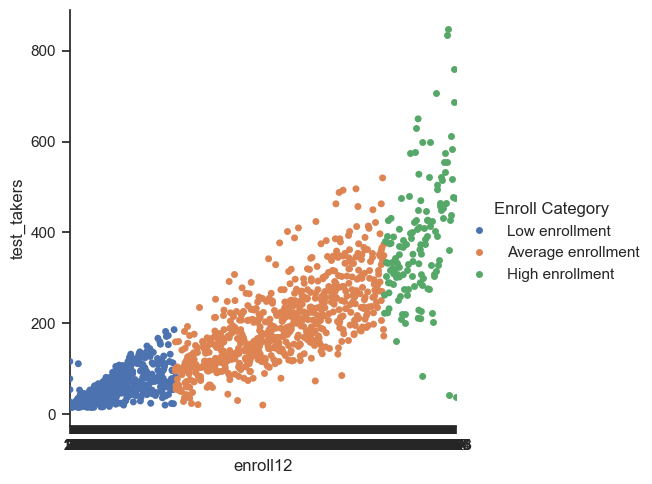

In [93]:
# Create a categorical plot in seaborn using the enrollment categories 

sns.set(style="ticks")
cat_plot = sns.catplot(x="enroll12", y="test_takers", hue="Enroll Category", data=numeric_record_s)
plt.show()

##### Observations:
1. More schools have an average enrollment range in CA
2. Few schools have high enrollment
3. The higher the enrollment, the more test takers there are
4. Low enrollment schools have less test takers

### Questions to Explore

##### 
##### •	Does grade size affect scores? 
Based on the categorical plot above, it does seem that schools with a higher 12th grade enrollment have more test takers, but scores may be the same low enrollment. Enrollment to test takers ratio needs to be calculated and compared
##### •	Which category has higher/lower scores?
Still need to look into
##### •	Which district has higher/lower scores?
Still need to look into
#####     o	Do the categories vary for each?
Still need to look into

##### Hypotheses:
1. The lower the enrollment, the higher the test takers
2. The higher the enrollment, the lower the test scores
3. The higher the test takers, the higher the test scores

#### Summary:
1. df_sat_cleaned 2334,14
2. New dataframe created:
df_numeric, df_sat_cleaned2, df_record_c, df_record_d, df_record_s, df_record_x, df_cleaned_no_x, df_numeric2
3. df_numeric: only numeric data types included 1720, 7
4. df_sat_cleaned2 outliers of SAT scores removed 1720, 14
5. df_record_c only record_type of county 47, 14
6. df_record_d only record_type of district 421, 14
7. df_record_s only record_type of school 1251, 14
8. df_record_x only record_type of other 1, 14
9. df_cleaned_no_x data with a record_type of "other" removed 1720, 14
10. df_numeric2 only numeric data types from df_cleaned_no_x 1720, 7
11. Subsets created:
numeric_record_s only numeric values of df_record_s 1251, 8
12. new columns:
Enroll Category


### Exports

In [43]:
#Exporting df
df_cleaned_no_x.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_Relationships.csv'))

In [44]:
#Exporting numeric df
df_numeric2.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_Numerics.csv'))

In [45]:
#Exporting record type dfs
df_record_c.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_County.csv'))
df_record_d.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_Districts.csv'))
df_record_s.to_csv(os.path.join(path, 'Data','Prepared Data', 'SAT_Report_Schools.csv'))

In [46]:
#Exporting heatmap

heatmap1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'heatmap1.png'))
heatmap_titled.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'heatmap_titled.png'))
heatmap2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'heatmap2.png'))
f.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'f.png'))

corr_map.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'corr.png'))
corr_map2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'corr2.png'))

In [47]:
#Exporting scatterplot

scatterplot1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot1.png'))
scatterplot2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot2.png'))

In [48]:
#Export Pair Plot
numeric_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'numericplot.png'))

In [49]:
#Export categorical plot
cat_plot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'catplot.png'))

In [50]:
#Export histogram

histogram.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'histogram.png'))